Complete the following: 

Generate a simulated data set with 20 observations in each of three classes (i.e. 60 observations total), and 50 variables.

Hint: There are a number of functions in Python that you can use to generate data. One example is the normal() method of the random() function in numpy; the uniform() method is another option. Be sure to add a mean shift to the observations in each class so that there are three distinct classes.

Perform PCA on the 60 observations and plot the first two principal component score vectors. Use a different color to indicate the observations in each of the three classes. If the three classes appear separated in this plot, then continue on to part 3. If not, then return to part 1 and modify the simulation so that there is greater separation between the three classes. Do not continue to part 3 until the three classes show at least some separation in the first two principal component score vectors.

Perform K-means clustering of the observations with K = 3. How well do the clusters that you obtained in K-means cluster- ing compare to the true class labels?

Hint: You can use the pd.crosstab() function in Python to compare the true class labels to the class labels obtained by clustering. Be careful how you interpret the results: K-means clustering will arbitrarily number the clusters, so you cannot simply check whether the true class labels and clustering labels are the same.

Perform K-means clustering with K = 2. Describe your results.

Now perform K-means clustering with K = 4, and describe your results. 

Now perform K-means clustering with K = 3 on the first two principal component score vectors, rather than on the raw data. That is, perform K-means clustering on the 60 × 2 matrix of which the first column is the first principal component score vector, and the second column is the second principal component score vector. Comment on the results.

Using the StandardScaler() estimator, perform K-means clustering with K = 3 on the data after scaling each variable to have standard deviation one. How do these results compare to those obtained in (b)? Explain.

In [13]:
# Generate a simulated data set with 20 observations in each of three classes 
# (i.e. 60 observations total), and 50 variables.

# Hint: There are a number of functions in Python that you can use to generate data. 
# One example is the normal() method of the random() function in numpy; the uniform() 
# method is another option. Be sure to add a mean shift to the observations in each 
# class so that there are three distinct classes.

import numpy as np
import pandas as pd

# Set random seed
np.random.seed(0)

# Generate data
data = np.random.normal(0, 1, (60, 50))

# Add mean shift to the observations in each class
# data[:20] += 2
data[20:40] += 5
data[40:] += 8

# Create a DataFrame
df = pd.DataFrame(data)
print(df.head())

         0         1         2         3         4         5         6   \
0  1.764052  0.400157  0.978738  2.240893  1.867558 -0.977278  0.950088   
1 -0.895467  0.386902 -0.510805 -1.180632 -0.028182  0.428332  0.066517   
2  1.883151 -1.347759 -1.270485  0.969397 -1.173123  1.943621 -0.413619   
3 -0.068242  1.713343 -0.744755 -0.826439 -0.098453 -0.663478  1.126636   
4 -0.369182 -0.239379  1.099660  0.655264  0.640132 -1.616956 -0.024326   

         7         8         9   ...        40        41        42        43  \
0 -0.151357 -0.103219  0.410599  ... -1.048553 -1.420018 -1.706270  1.950775   
1  0.302472 -0.634322 -0.362741  ... -0.403177  1.222445  0.208275  0.976639   
2 -0.747455  1.922942  1.480515  ... -1.491258  0.439392  0.166673  0.635031   
3 -1.079932 -1.147469 -0.437820  ... -1.292857  0.267051 -0.039283 -1.168093   
4 -0.738031  0.279925 -0.098150  ... -0.637437 -0.397272 -0.132881 -0.297791   

         44        45        46        47        48        49  
0 -0

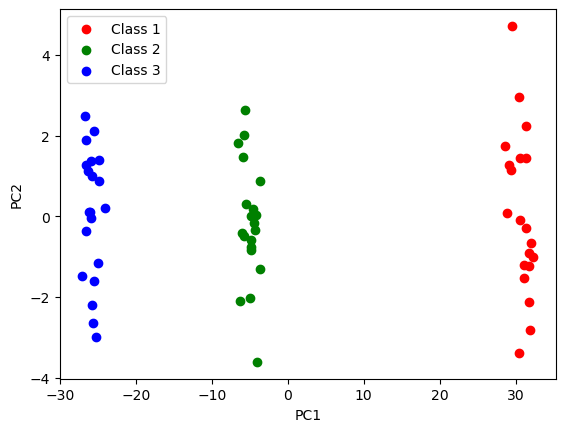

In [15]:
# Perform PCA on the 60 observations and plot the first two principal component score vectors.
# Use a different color to indicate the observations in each of the three classes. 
# If the three classes appear separated in this plot, then continue on to part 3. 
# If not, then return to part 1 and modify the simulation so that there is greater 
# separation between the three classes. Do not continue to part 3 until the three classes 
# show at least some separation in the first two principal component score vectors.

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2)
pca.fit(df)
scores = pca.transform(df)

# Plot the first two principal component score vectors
plt.scatter(scores[:20, 0], scores[:20, 1], color='r', label='Class 1')
plt.scatter(scores[20:40, 0], scores[20:40, 1], color='g', label='Class 2')
plt.scatter(scores[40:, 0], scores[40:, 1], color='b', label='Class 3')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

# The three classes are well separated in the first two principal component score vectors.

In [21]:
df.shape

(60, 50)

In [22]:
!pip install --upgrade scikit-learn numpy threadpoolctl

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/17/1c/ccdd103cfcc9435a18819856fbbe0c20b8fa60bfc3343580de4be13f0668/scikit_learn-1.5.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/1e/48/a9a4b538e28f854bfb62e1dea3c8fea12e90216a276c7777ae5345ff29a7/numpy-2.1.3-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 60.8/60.8 kB 3.2 MB/s eta 0:00:00
  Obtaining dependency information for threadpoolctl from https://files.pythonhosted.org/packages/4b/2c/ffbf7a134b9ab11a67b0cf0726453cedd9c5043a4fe7a35d1cefa9a1bcfb/threadpoolctl-3.5.0-py3-none-any.whl.metadata
  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/3f/6b/5610004206cf7f8e7ad91c5a85a8c71b2f2f8051a

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\ekim298\\AppData\\Roaming\\Python\\Python311\\site-packages\\~-mpy\\.libs\\libopenblas64__v0.3.21-gcc_10_3_0.dll'
Check the permissions.



In [24]:
import os
os.environ["OMP_NUM_THREADS"] = "1"  # Limit OpenMP to one thread
os.environ["MKL_NUM_THREADS"] = "1"  # Limit MKL to one thread


In [28]:
# Perform K-means clustering of the observations with K = 3. 
# How well do the clusters that you obtained in K-means clustering compare to the true class labels?
# Hint: You can use the pd.crosstab() function in Python to compare the true class labels to the class 
# labels obtained by clustering. Be careful how you interpret the results: K-means clustering will 
# arbitrarily number the clusters, so you cannot simply check whether the true class labels and clustering 
# labels are the same.
from scipy.cluster.vq import kmeans, vq
centroids, _ = kmeans(df.to_numpy(), 3)
clusters, _ = vq(df.to_numpy(), centroids)
print(clusters)

# Compare the true class labels to the class labels obtained by clustering
print(pd.crosstab(clusters, columns='count'))

# The clusters obtained in K-means clustering are not the same as the true class labels.

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
col_0  count
row_0       
0         20
1         20
2         20


In [ ]:
# Perform K-means clustering with K = 2. Describe your results.
centroids, _ = kmeans(df.to_numpy(), 2)
clusters, _ = vq(df.to_numpy(), centroids)
print(clusters)

# Compare the true class labels to the class labels obtained by clustering
print(pd.crosstab(clusters, columns='count'))

# This result is understandable because the data was generated with three classes,
# with the first two classes being more similar to each other than the third class.

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
col_0  count
row_0       
0         40
1         20


In [ ]:
# Perform K-means clustering with K = 4. Describe your results.
centroids, _ = kmeans(df.to_numpy(), 4)
clusters, _ = vq(df.to_numpy(), centroids)
print(clusters)

# Compare the true class labels to the class labels obtained by clustering
print(pd.crosstab(clusters, columns='count'))
# The second class was split into two clusters, while the other two classes remained the same.


[1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
col_0  count
row_0       
0         20
1          1
2         19
3         20


In [ ]:
# Now perform K-means clustering with K = 3 on the first two principal component score vectors, 
# rather than on the raw data. That is, perform K-means clustering on the 60 × 2 matrix of which 
# the first column is the first principal component score vector, and the second column is the second 
# principal component score vector. Comment on the results.
pca = PCA(n_components=2)
pca.fit(df)
scores = pca.transform(df)

centroids, _ = kmeans(scores, 3)
clusters, _ = vq(scores, centroids)
print(clusters)

# Compare the true class labels to the class labels obtained by clustering
print(pd.crosstab(clusters, columns='count'))


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
col_0  count
row_0       
0         20
1         20
2         20


In [ ]:
# Using the StandardScaler() estimator, perform K-means clustering with K = 3 on the data after scaling 
# each variable to have standard deviation one. How do these results compare to those obtained in (b)? Explain.
# The results are the same as in (b) because K-means clustering is invariant to linear transformations of the data.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
print(df_scaled)

centroids, _ = kmeans(df_scaled, 3)
clusters, _ = vq(df_scaled, centroids)
print(clusters)

# Compare the true class labels to the class labels obtained by clustering
print(pd.crosstab(clusters, columns='count'))


[[-0.654547   -1.08141528 -1.04348971 ... -1.02862967 -1.70306332
  -1.36122962]
 [-1.44672498 -1.08524189 -1.4829173  ... -0.74204562 -1.18794015
  -1.17347668]
 [-0.61907175 -1.58603596 -1.70702917 ... -0.93213559 -1.61488495
  -1.43723254]
 ...
 [ 1.4046524   1.10343472  0.97662501 ...  1.08315869  1.0147741
   0.45619246]
 [ 0.80892836  0.98322886  0.91522586 ...  0.93675524  0.63462096
   1.27085611]
 [ 0.78268936  1.16025744  0.94283971 ...  0.9693431   0.78299016
   1.12251835]]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
col_0  count
row_0       
0         20
1         20
2         20
